# Quantitative easing following the Financial Crisis in 2008

# Introduction

The aim of this project is to examine the use of Quantitative Easing (QE) by the Federal Reserve Bank of America (FED) in response to the Financial Crisis in 2008 and focus on the first round of QE in the US called QE1. We estimate effect the use of QE1 had on yields of bonds and decompose the effect down into several channels that QE can effect through. We took on this project because we find QE interresting since it was a central response trying to stabilize the financial markets and lowering the interest rates to stimulate growth following the Financial Crisis.

We do so by employing an event study methodology inspired by Krishnamurthy and Vissing-Jorgensen's (2011) approach. Our analysis reveals that the implementation of QE1 had a statistically significant impact on bond yields.

# Data 

To examine the effect of QE1 we use data from Bloomberg in the period from January 2 2008 until December 30 2011. The data we use are the interest rate on US Treasuries with maturity of 1, 3, 5, 10 and 30 years. We also use the interest rate on agency bonds (Fannie Mae and Freddie Mac) with maturity 3, 5, 10 and 30 years. Furthermore we use data from Federal Funds Futures (FFF) contracts with the maturity of 3, 6, 12 and 24 months.

# The channels

In this section, we will describe how QE1 operates through various channels. These channels are used to analyze the effects that QE1 had on interest rates.

The signaling channel:

Announcements from the US central bank, the Federal Reserve (Fed), regarding its monetary policy provide the market with new information to consider. This information is conveyed through the signaling channel. The purpose of this channel is to capture the market's expectations regarding the Fed's future interest rates based on the Fed's QE announcements. When the Fed engages in large-scale purchases of long-term assets through unconventional monetary policy such as QE1, it signals its willingness to keep interest rates low for an extended period. This action enhances the Fed's credibility with the market. The signaling channel is examined by using Federal Funds Futures as an indicator of the financial market's expectations for future Federal Funds rates.

The liquidity channel:

Through the liquidity channel, it is expected that QE1 will increase the yields on more liquid government bonds relative to less liquid agency bonds. Additionally, it is expected that the liquidity premium will be lowered. The liquidity premium represents the extra price that investors are willing to pay for more liquid assets.We utilize the yield spread between US Treasury bonds and agency bonds to examine the liquidity channel. To isolate the effect of the liquidity channel, we assume that the credit and default risk of US Treasury bonds and agency bonds are the same. This assumption is based on the fact that Fannie Mae and Freddie Mac were taken over by US authorities on September 7, 2008, and thus were secured by the US government.

The security channel:

By utilizing QE, we expect that the yields on safe assets such as government bonds and riskier assets like agency bonds will be negatively affected. Furthermore, we anticipate that the yield spread between safe assets and riskier assets will increase. This expectation is based on the relatively low supply of highly secure assets.
We estimate the effect of the security channel by examining the spread between the change in agency bonds and the change in Federal Funds Futures (24 months). To isolate the security channel, we implicitly assume that neither the change in agency bonds nor the change in Federal Funds Futures is affected by the overall liquidity supply from QE1.

# Imports and merging of data:

In the following code we start by importing required libraries such as pandas, numpy, matplotlib, and ipywidgets. Furthermore we import a module named "dataproject" and load the autoreload extension package. This package allows the code to automatically reload any modified modules when the code is run.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from IPython.display import display

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2
%matplotlib widget

# user written modules
import dataproject

# Read and merge data

In order to analyze the spread between treasuries and agency bonds we need to merge the two datasets together.

We import the data. We do this with CVS files. The code reads our two data CVS files named 'Treasuries.csv' and 'Agency.csv' using pandas' read_csv() function. We than stores them in two separate data frames named 'df_tres' and 'df_agency'. We use the merge()' function to merge the two data frames int a single data fram named 'df_merged' based on the 'Date' column. We do the same Federal Funds Futures (FFF).

Finally we showcase the data by printing the first 10 rows of the merged data frame 'df_merged.

In [2]:
# Make csv files into dataframes and merge datasets
df_tres = pd.read_csv('Treasuries.csv', sep=";")
df_agency = pd.read_csv('Agency.csv', sep=";")
df_FFF = pd.read_csv('Fed Fund Futures.csv', sep=";")

print(df_tres.columns)
print(df_agency.columns)
print(df_FFF.columns)

df_merged = df_tres.merge(df_agency, on="Date", how='inner')
df_merged.sort_values(by=['Number'], ascending=False)
df_merged["Date"] = pd.to_datetime(df_merged["Date"], format="%d.%m.%Y")

# Convert "Date" column in df_FFF to datetime
df_FFF["Date"] = pd.to_datetime(df_FFF["Date"], format="%d.%m.%Y")

# Merge df_FFF with the merged dataframe
df_merged = df_merged.merge(df_FFF, on="Date", how='inner')

# Display the first 10 rows of the merged dataframe
display(df_merged.head(10))

Index(['Date', '1 year', '3 year', '5 year', '10 year', '30 year', 'Number',
       'Citi surprise'],
      dtype='object')
Index(['Date', 'Freddie Mac 10', 'Fannie Mae 10', 'Fannie Mae 30',
       'Freddie Mac 30', 'Freddie Mac 5', 'Fannie Mae 5', 'Freddie Mac 3',
       'Fannie Mae 3'],
      dtype='object')
Index(['Date', 'FFF 3 months', 'FFF 6 months', 'FFF 12 months',
       'FFF 24 months'],
      dtype='object')


,Date,1 year,3 year,5 year,10 year,30 year,Number,Citi surprise,Freddie Mac 10,Fannie Mae 10,Fannie Mae 30,Freddie Mac 30,Freddie Mac 5,Fannie Mae 5,Freddie Mac 3,Fannie Mae 3,FFF 3 months,FFF 6 months,FFF 12 months,FFF 24 months
0,2011-12-30,12,36,83,189,289,1001,6850,166,188,319,321,109,113,60,60,9,11,15,27
1,2011-12-29,12,41,88,191,290,1000,6940,169,191,320,321,114,118,65,66,9,12,15,31
2,2011-12-28,12,42,91,193,291,999,6950,173,194,321,322,118,121,68,68,9,12,15,32
3,2011-12-27,12,45,96,202,304,998,7120,181,202,334,336,124,127,72,73,9,12,15,33
4,2011-12-23,12,45,97,203,305,997,7120,181,202,335,337,124,127,72,73,9,12,15,32
5,2011-12-22,12,41,91,197,299,996,6940,177,197,329,331,119,122,69,69,9,12,15,29
6,2011-12-21,13,40,91,198,300,995,7050,176,203,330,332,119,123,68,68,9,12,15,28
7,2011-12-20,12,39,88,194,293,994,7390,175,197,323,326,120,123,68,69,9,12,15,27
8,2011-12-19,11,36,82,182,279,993,7340,167,191,311,312,116,119,66,67,9,12,15,25
9,2011-12-16,11,35,81,186,286,992,7550,169,193,318,319,114,118,66,65,9,12,14,28


## Explore each data set

**Interactive plot** :

The following code is creating an interactive plot using the Matplotlib and ipywidgets libraries. It starts by enabling the "widget" backend for Matplotlib by running the command '%matplotlib widget'.
The interactive plot depicts the US Treasuries alongside the agency bonds issued by Fannie Mae and Freddie Mac, during the time span of January 2008 to January 2012. Furthermore it depicts the Federal Funds Futures and the first annoncement date.

SelectMultiple(description='Select variables:', index=(0,), options=('1 year', '3 year', '5 year', '10 year', …

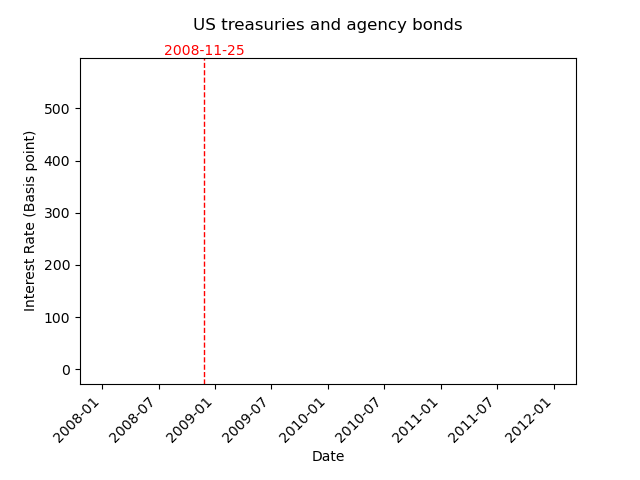

In [3]:
# Load data
variable_names = ['1 year', '3 year', '5 year', '10 year', '30 year', 'Fannie Mae 30', 'Fannie Mae 10', 'Fannie Mae 5', 'FFF 3 months', 'FFF 6 months', 'FFF 12 months', 'FFF 24 months']

# Define initial plot
fig, ax = plt.subplots()
lines = []
for variable_name in variable_names:
    line, = ax.plot(df_merged['Date'], df_merged[variable_name], label=variable_name, visible=False)
    lines.append(line)

# Define callback function to update plot
def update_plot(change):
    selected_variables = change.new
    for i, line in enumerate(lines):
        if variable_names[i] in selected_variables:
            line.set_visible(True)
        else:
            line.set_visible(False)
    ax.legend([var for var in variable_names if var in selected_variables], loc='upper right')  # Update legend with selected variables
    fig.canvas.draw_idle()

# Set x, y labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Interest Rate (Basis point)')
ax.set_title('US treasuries and agency bonds', pad=20)

# Define widget
select_multiple = widgets.SelectMultiple(options=variable_names, value=[variable_names[0]], description='Select variables:')
select_multiple.observe(update_plot, names='value')

# Add annoncement dates
specific_dates = pd.to_datetime(['2008-11-25'])
for specific_date in specific_dates:
    ax.axvline(x=specific_date, color='red', linestyle='--', linewidth=1)
    ax.text(specific_date, ax.get_ylim()[1], specific_date.strftime('%Y-%m-%d'), color='red', ha='center', va='bottom', rotation='horizontal')

# Set x-axis tick parameters
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to make room for tick labels

# Display plot and widget
display(select_multiple)

Our interactive graph can show the interest rate on US Treasuries with maturity 1, 3, 5, 10 and 30 years and also show the interest rate on agency bonds (Freddie Mac and Fannie Mae) with maturity 3, 5, 10 and 30 years. Furthermore the interactive graph showcase the Federal Funds Futures rates with maturity 3, 6, 12 and 24 months. In our interactive graph you can choose multiple interest rates and compare them, so you can see the changes in the interest rates and how they compare especially around the annoucements. We have inserted the date of the first annoncement as red line.

We will create a new variable representing the spread between Agency bonds and treasuries with the same duration. Additionally, we will calculate the spread between Federal Funds Futures (24 months) and Agency bonds. To improve visual appearance, we will apply smoothing to the spread between FFF(24) and Agency bonds. Furthermore, we will display the smoothed FFF(24) data which we use to showcase the signaling channel.

We display the spread in a graph:

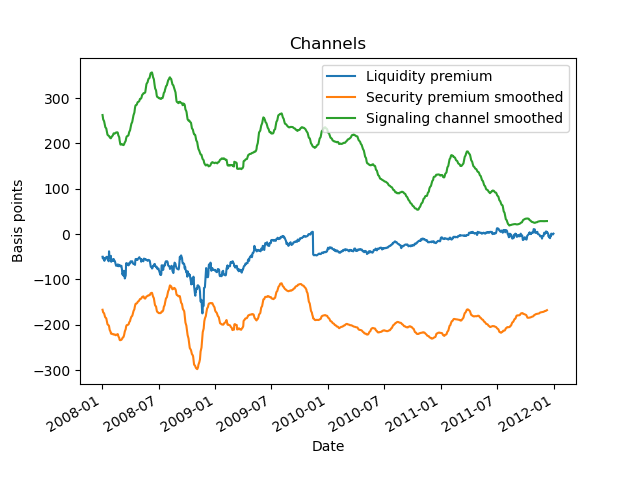

In [4]:
df_merged['liquidity channel 10'] = df_merged['10 year'] - df_merged['Fannie Mae 10']
df_merged['security channel 10'] = df_merged['FFF 24 months'] - df_merged['Fannie Mae 10'] 

# Apply rolling average to security channel
window_size = 15  # Adjust the window size as desired
df_merged['security channel 10 smoothed'] = df_merged['security channel 10'].rolling(window_size).mean()
df_merged['FFF 24 months smoothed'] = df_merged['FFF 24 months'].rolling(window_size).mean()

fig1, ax1 = plt.subplots()

# Plot the liquidity channel
ax1.plot(df_merged['Date'], df_merged['liquidity channel 10'], label='Liquidity premium')

# Plot the smoothed security channel
ax1.plot(df_merged['Date'], df_merged['security channel 10 smoothed'], label='Security premium smoothed')

# Plot the 'FFF 24 months' data
ax1.plot(df_merged['Date'], df_merged['FFF 24 months smoothed'], label='Signaling channel smoothed')

# Set y-axis label
ax1.set_ylabel('Basis points')

# Set x-axis label
ax1.set_xlabel('Date')

# Set title
ax1.set_title('Channels')

# Set legend
ax1.legend(loc='upper right')

# Adjust x-axis tick spacing
fig1.autofmt_xdate()

# Analysis

In our event study, we focus on 5 announcement dates :

- On November 25, 2008, the FED announces the creation of a program to purchase 500 billion dollar of MBS and 100 billion dollar of agency debt.

- On December 1, 2008, the FED Chairman Ben Bernanke gives a speech where he addresses and elaborates on the FED's plans to use unconventional monetary policy and announces that the FED plans to purchase large quantities of long-term US government bonds.

- On December 16, 2008, the FED issues a statement that its policy will focus on supporting financial markets through MBS purchases. The FED will also investigate the benefits of purchasing long-term US government bonds and generally explore options for supporting credit markets and economic activity through the FED's balance sheet. The FED establishes an upper and lower bound for the Federal Funds Rate target range, which is set between 0% and 0.25%.

- On January 28, 2009, the FED reiterates its commitment to expand the program of purchasing agency debt and MBS. The FED also maintains the target range for the Federal Funds Rate between 0% and 0.25%, which was established on December 16, 2008.

- On March 18, 2009, the FED announces the specific amounts it will purchase of various assets, including $300 billion of long-term US government bonds. The FED also sets an upper limit on its purchases.


We assume the efficient market hypothesis so the investors believes about the announcement will be shown in the yield when the announcement is made. We have chosen a 2 day interval for the event days so we assume that the effect from QE will be fully intergrated in the pricens and yield within the interval.

We generate dummy variables to represent the event days that will be utilized in our analysis. Subsequently, we employ ordinary least squares (OLS) regressions on the event days for the signaling channel, liquidity channel, and security channel. These regressions enable us to estimate the effects of the QE1 announcements.

In [5]:
import statsmodels.api as sm

# Set two specific dates
date1 = '2008-11-25'
date2 = '2008-11-26'
date3 = '2008-12-01'
date4 = '2008-12-02'
date5 = '2008-12-16'
date6 = '2008-12-17'
date7 = '2009-01-28'
date8 = '2009-01-29'
date9 = '2009-03-18'
date10 = '2009-03-19'

# Create a dummy variable based on the two dates
df_merged['2008-11-25'] = 0
df_merged.loc[(df_merged['Date'] == date1) | (df_merged['Date'] == date2), '2008-11-25'] = 1
df_merged['2008-12-01'] = 0
df_merged.loc[(df_merged['Date'] == date3) | (df_merged['Date'] == date4), '2008-12-01'] = 1
df_merged['2008-12-16'] = 0
df_merged.loc[(df_merged['Date'] == date5) | (df_merged['Date'] == date6), '2008-12-16'] = 1
df_merged['2009-01-28'] = 0
df_merged.loc[(df_merged['Date'] == date7) | (df_merged['Date'] == date8), '2009-01-28'] = 1
df_merged['2009-03-18'] = 0
df_merged.loc[(df_merged['Date'] == date9) | (df_merged['Date'] == date10), '2009-03-18'] = 1


In the following code we performs regression analysis for the 'liquidity channel 10' and 'security channel 10', against a set of independent variables that include the dummy variables that we have defined above. By executing the following code, we will obtain the regression summaries for both the liquidity channel and the security channel, allowing us to analyze the coefficients and statistical significance of the independent variables in each regression model.

In [6]:
# Define the dependent variables
y_signaling = df_merged['FFF 24 months']

# Define the independent variables, including the dummies
X = df_merged[['2008-11-25', '2008-12-01', '2008-12-16', '2009-01-28', '2009-03-18']]
X = sm.add_constant(X)

# Fit the regression model for the signaling channel
model_signaling = sm.OLS(y_signaling, X).fit()


# Print the model summary for the signaling channel
print("Regression Summary for Signaling Channel:")
print(model_signaling.summary())
print()

Regression Summary for Signaling Channel:
                            OLS Regression Results                            
Dep. Variable:          FFF 24 months   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1465
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.981
Time:                        21:25:31   Log-Likelihood:                -5857.8
No. Observations:                1000   AIC:                         1.173e+04
Df Residuals:                     994   BIC:                         1.176e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

From our event study of the signaling channel we see that every announcement had a negative effect on the rates. 

In [7]:
# Define the dependent variables
y_liquidity = df_merged['liquidity channel 10']

# Fit the regression model for the liquidity channel
model_liquidity = sm.OLS(y_liquidity, X).fit()

# Print the model summary for the liquidity channel
print("Regression Summary for Liquidity Channel:")
print(model_liquidity.summary())
print()


Regression Summary for Liquidity Channel:
                             OLS Regression Results                             
Dep. Variable:     liquidity channel 10   R-squared:                       0.027
Model:                              OLS   Adj. R-squared:                  0.023
Method:                   Least Squares   F-statistic:                     5.610
Date:                  Thu, 25 May 2023   Prob (F-statistic):           4.16e-05
Time:                          21:25:31   Log-Likelihood:                -4891.4
No. Observations:                  1000   AIC:                             9795.
Df Residuals:                       994   BIC:                             9824.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

From our event study of the liquidity channel we see that every announcement had a negative effect on the interest rate spread between the 10-year treasuries and the 10-year agency bond which also can be seen with the interactive graph. According to our model the third announcement doesn’t have a significant effect on the interest rate spread on a five-pct. level. The fifth announcement almost have a significant effect at a five-pct. level. This shows that the QE announcement lowered the interest rate on agency bonds relative to treasuries.

In [8]:
# Define the dependent variables
y_security = df_merged['security channel 10']

# Fit the regression model for the security channel
model_security = sm.OLS(y_security, X).fit()

# Print the model summary for the security channel
print("Regression Summary for Security Channel:")
print(model_security.summary())

Regression Summary for Security Channel:
                             OLS Regression Results                            
Dep. Variable:     security channel 10   R-squared:                       0.008
Model:                             OLS   Adj. R-squared:                  0.003
Method:                  Least Squares   F-statistic:                     1.644
Date:                 Thu, 25 May 2023   Prob (F-statistic):              0.146
Time:                         21:25:31   Log-Likelihood:                -5034.8
No. Observations:                 1000   AIC:                         1.008e+04
Df Residuals:                      994   BIC:                         1.011e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

From our event study of the security channel we see that every announcement had a negative effect on the interest rate spread between the 10-year agency bond and the Federal Funds Futures (FFF(24)) which also can be seen with the interactive graph. 

# Conclusion

We conclude that QE1 was an effective monetary policy in reducing interest rates. In our empirical analysis, we have documented the effects of QE1. The use of QE1 by the Fed had a significant impact on US Treasury bonds by lowering them. Furthermore, QE1 also had a significant effect on agency bonds by lowering them. We also showed that QE1 worked through different channels.